In [2]:
import sage
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import minimize

In [3]:
def helper(Z,R):
    return np.exp(-Z*R)*(1 + Z*R + (1/3 * Z**2 * R**2))
def numerator(Z, R):
    # 2c^2 terms cancel!
    first_line = 1/2 * Z**2 - Z - 1/R + np.exp(-2*Z*R) * (Z+1/R)
    second_line = -1/2 * Z**2 * helper(Z,R) + Z*(Z-2)*(1+Z*R)*np.exp(-Z*R)
    third_line = 1/R*(1+helper(Z,R))
    return first_line+second_line+third_line
def denominator(Z, R):
    return 1+helper(Z,R)

In [4]:
def variational_energy(Z, R):
    return numerator(Z,R)/denominator(Z,R)

In [9]:
Z = np.arange(0,5,.01)
R = np.arange(.5,5,.01)
Z, R = np.meshgrid(Z, R)

In [10]:
E = variational_energy(Z,R)

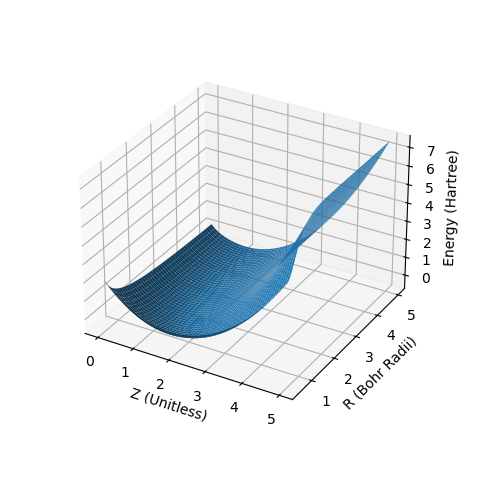

In [11]:
# Draw an energy contour plot
ax = plt.figure(figsize=(10,6)).add_subplot(projection='3d')
ax.set_xlabel("Z (Unitless)")
ax.set_ylabel("R (Bohr Radii)")
ax.set_zlabel("Energy (Hartree)")
surf = ax.plot_surface(Z,R,E)#, cmap=cm.coolwarm)
ax.set_box_aspect(aspect=None, zoom=0.8)
plt.savefig("../figures/variational_energy_contour")
plt.show()

In [12]:
x0 = [1.24, 2]
def min_wrapper(params):
    Z, R = params
    return variational_energy(Z, R)
res = minimize(min_wrapper, x0, method='nelder-mead',
               options={'xatol':1e-9,'disp': True})

Optimization terminated successfully.
         Current function value: -0.586507
         Iterations: 56
         Function evaluations: 117


In [13]:
res.x

array([1.23802924, 2.00329558])

In [14]:
-.5-min_wrapper(res.x)

0.086506502156534

In [15]:
R_range = np.arange(0.944,6.62, .001)
Z_range = np.arange(0,5,.001)
values = [variational_energy(Z_range, R).min() for R in R_range]

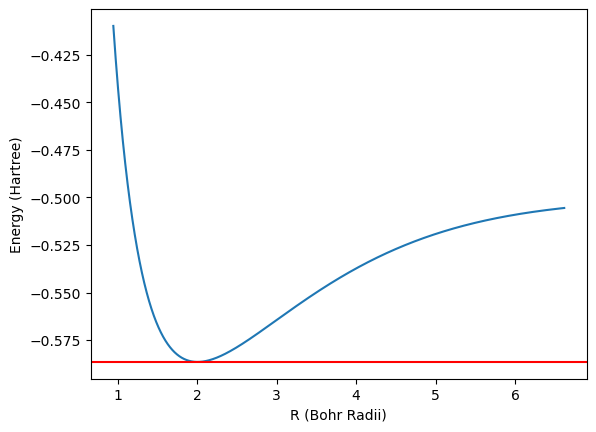

In [16]:
plt.plot(R_range, values)
plt.axhline(-.5865065021560159, color="red")
plt.xlabel("R (Bohr Radii)")
plt.ylabel("Energy (Hartree)")
plt.savefig("../figures/variational_dissociation")
plt.show()